from sklearn.preprocessing import RobustScaler
# ^^^ pyforest auto-imports - don't write above this line
___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 11<br><br>Multivariate Time Series Forecasting with RNN<br><br>(Manually)<br><h1>

# Dataset Info

Appliance Energy Usage: A Multivariate Time Series Forecasting Example

Experimental data used to create regression models of appliances energy use in a low energy building.
Data Set Information:

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).
Original source of the dataset:

http://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction

- date time year-month-day hour:minute:second
- Appliances, energy use in Wh
- lights, energy use of light fixtures in the house in Wh
- T1, Temperature in kitchen area, in Celsius
- RH_1, Humidity in kitchen area, in %
- T2, Temperature in living room area, in Celsius
- RH_2, Humidity in living room area, in %
- T3, Temperature in laundry room area
- RH_3, Humidity in laundry room area, in %
- T4, Temperature in office room, in Celsius
- RH_4, Humidity in office room, in %
- T5, Temperature in bathroom, in Celsius
- RH_5, Humidity in bathroom, in %
- T6, Temperature outside the building (north side), in Celsius
- RH_6, Humidity outside the building (north side), in %
- T7, Temperature in ironing room , in Celsius
- RH_7, Humidity in ironing room, in %
- T8, Temperature in teenager room 2, in Celsius
- RH_8, Humidity in teenager room 2, in %
- T9, Temperature in parents room, in Celsius
- RH_9, Humidity in parents room, in %
- To, Temperature outside (from Chievres weather station), in Celsius
- Pressure (from Chievres weather station), in mm Hg
- RH_out, Humidity outside (from Chievres weather station), in %
- Wind speed (from Chievres weather station), in m/s
- Visibility (from Chievres weather station), in km
- Tdewpoint (from Chievres weather station), Â°C
- rv1, Random variable 1, nondimensional
- rv2, Random variable 2, nondimensional

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Recognizing and Understanding Data

In [2]:
pwd

'C:\\Users\\HP\\DATA_SCIENCE_COURSE_NOTES\\2. Classes_Lab\\8. DeepLearning'

In [3]:
df = pd.read_csv('../8. DeepLearning/energydata_complete.csv',index_col='date', parse_dates = True)

In [4]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890,47.597,19.200,44.790,19.790,44.730,19.000,45.567,17.167,55.200,7.027,84.257,17.200,41.627,18.200,48.900,17.033,45.530,6.600,733.500,92.000,7.000,63.000,5.300,13.275,13.275
2016-01-11 17:10:00,60,30,19.890,46.693,19.200,44.722,19.790,44.790,19.000,45.992,17.167,55.200,6.833,84.063,17.200,41.560,18.200,48.863,17.067,45.560,6.483,733.600,92.000,6.667,59.167,5.200,18.606,18.606
2016-01-11 17:20:00,50,30,19.890,46.300,19.200,44.627,19.790,44.933,18.927,45.890,17.167,55.090,6.560,83.157,17.200,41.433,18.200,48.730,17.000,45.500,6.367,733.700,92.000,6.333,55.333,5.100,28.643,28.643
2016-01-11 17:30:00,50,40,19.890,46.067,19.200,44.590,19.790,45.000,18.890,45.723,17.167,55.090,6.433,83.423,17.133,41.290,18.100,48.590,17.000,45.400,6.250,733.800,92.000,6.000,51.500,5.000,45.410,45.410
2016-01-11 17:40:00,60,40,19.890,46.333,19.200,44.530,19.790,45.000,18.890,45.530,17.200,55.090,6.367,84.893,17.200,41.230,18.100,48.590,17.000,45.400,6.133,733.900,92.000,5.667,47.667,4.900,10.084,10.084


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9         

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.000,97.695,102.525,10.000,50.000,60.000,100.000,1080.000
lights,19735.000,3.802,7.936,0.000,0.000,0.000,0.000,70.000
T1,19735.000,21.687,1.606,16.790,20.760,21.600,22.600,26.260
RH_1,19735.000,40.260,3.979,27.023,37.333,39.657,43.067,63.360
T2,19735.000,20.341,2.193,16.100,18.790,20.000,21.500,29.857
RH_2,19735.000,40.420,4.070,20.463,37.900,40.500,43.260,56.027
T3,19735.000,22.268,2.006,17.200,20.790,22.100,23.290,29.236
RH_3,19735.000,39.243,3.255,28.767,36.900,38.530,41.760,50.163
T4,19735.000,20.855,2.043,15.100,19.530,20.667,22.100,26.200
RH_4,19735.000,39.027,4.341,27.660,35.530,38.400,42.157,51.090


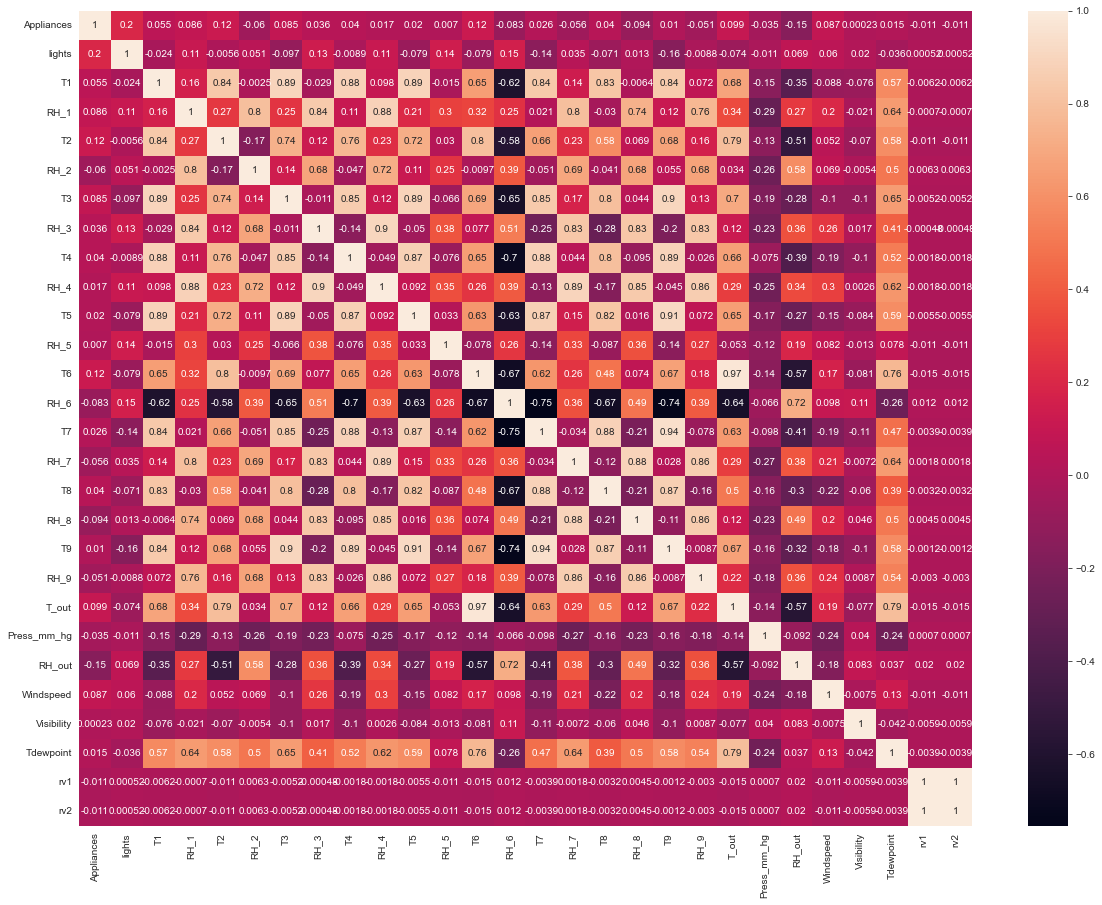

In [7]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True);

# Data Pre-Processing

## Feature Engineering
- Let's reduce the number of feature
- Let's resample the dataset by hours

In [8]:
df.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [9]:
df=df.rename(columns = {'T6':'T_outside', 'RH_6':'RH_outside'})
df["T_inside"] = (df["T1"] + df["T2"] + df["T3"] + df["T4"] + df["T5"] + df["T7"] + df["T8"] + df["T9"])/8
df["RH_inside"] = (df["RH_1"] + df["RH_2"] + df["RH_3"] + df["RH_4"] + df["RH_5"] + df["RH_7"] + df["RH_8"] + df["RH_9"])/8

In [10]:
drop_list = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
             'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'RH_out', 'rv1', 'rv2']
df.drop(drop_list, axis = 1, inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T_outside    19735 non-null  float64
 3   RH_outside   19735 non-null  float64
 4   Press_mm_hg  19735 non-null  float64
 5   Windspeed    19735 non-null  float64
 6   Visibility   19735 non-null  float64
 7   Tdewpoint    19735 non-null  float64
 8   T_inside     19735 non-null  float64
 9   RH_inside    19735 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 1.7 MB


In [12]:
df_a = df[["Appliances", "lights"]]
df_b = df.drop(["Appliances", "lights"], axis = 1)

In [13]:
df_a = df_a.resample("H").sum()
df_b = df_b.resample("H").mean()

In [14]:
df = pd.concat([df_a, df_b], axis =1)
df.head()

,Appliances,lights,T_outside,RH_outside,Press_mm_hg,Windspeed,Visibility,Tdewpoint,T_inside,RH_inside
date,,,,,,,,,,
2016-01-11 17:00:00,330,210,6.587,84.260,733.750,6.167,53.417,5.050,18.415,46.555
2016-01-11 18:00:00,1060,310,6.180,87.204,734.267,5.417,40.000,4.658,18.408,46.520
2016-01-11 19:00:00,1040,150,5.857,88.131,734.792,6.000,40.000,4.392,18.686,48.665
2016-01-11 20:00:00,750,210,5.469,86.934,735.283,6.000,40.000,4.017,18.941,50.356
2016-01-11 21:00:00,620,140,5.579,86.129,735.567,6.000,40.000,3.817,19.254,48.977


In [15]:
df.shape

(3290, 10)

Let's also round off the data, to one decimal point precision, otherwise this may cause issues with our network (we will also normalize the data anyways, so this level of precision isn't useful to us)

In [16]:
df = df.round(2)

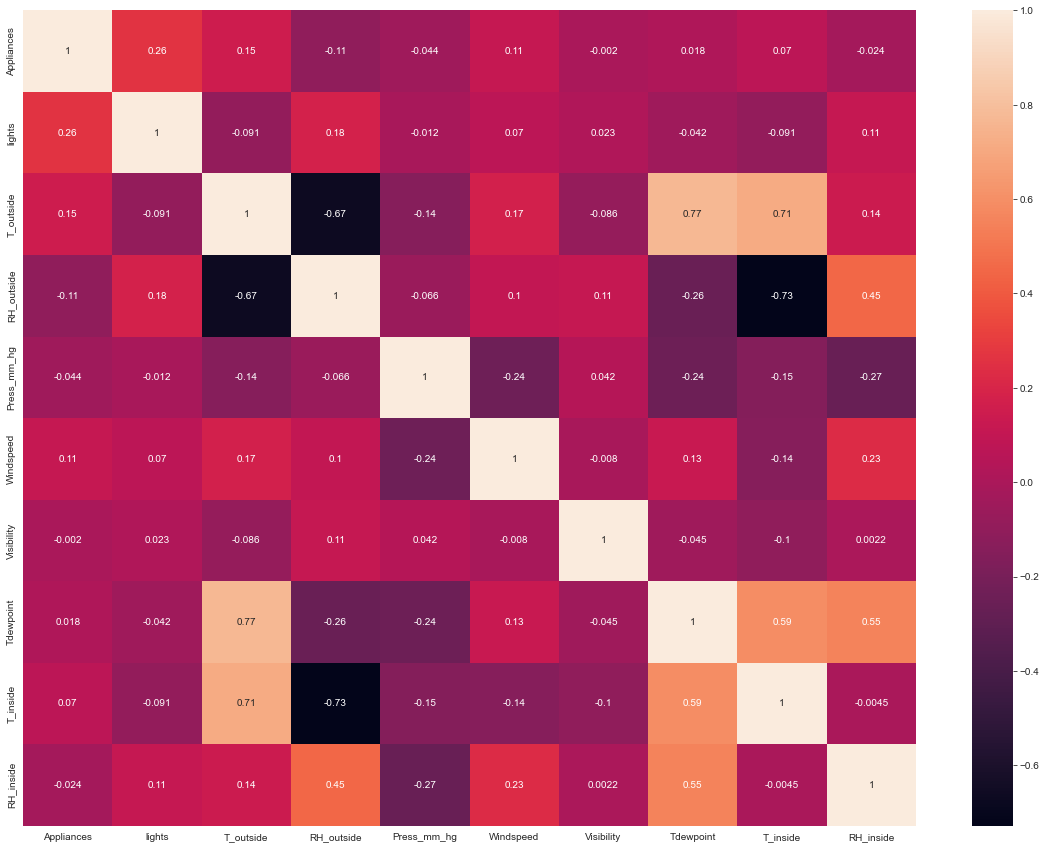

In [17]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True);

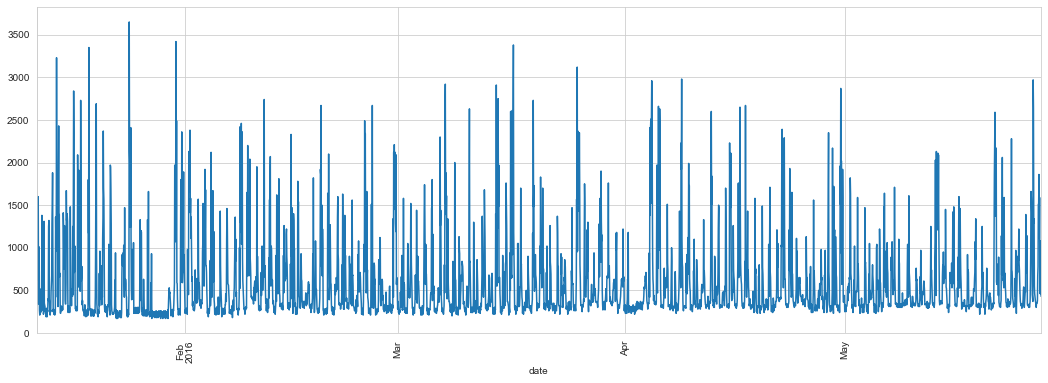

In [18]:
df['Appliances'].plot(figsize=(18,6))
plt.xticks(rotation=90);

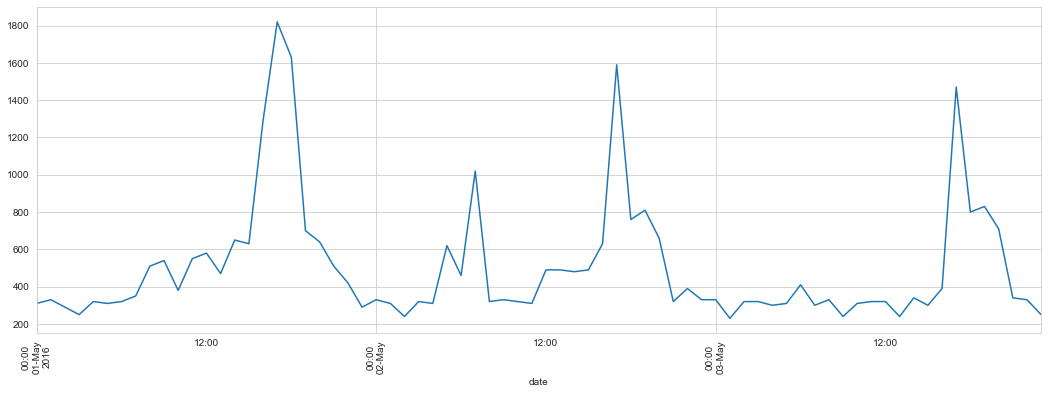

In [19]:
df['Appliances'].loc["2016-05-01 00:00:00" : "2016-05-03 23:00:00"].plot(figsize=(18,6))
plt.xticks(rotation=90);

### Train Test Split

In [20]:
len(df)

3290

In [21]:
# How many rows per day? # günlük olarak 24 satır var.
24

24

In [22]:
test_days = 7

In [23]:
test_ind = test_days*24

In [24]:
test_ind

168

In [25]:
train = df.iloc[:-test_ind]
test = df.iloc[-test_ind:]

In [26]:
train.shape, test.shape

((3122, 10), (168, 10))

### Scale Data

In [27]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [28]:
df.columns

Index(['Appliances', 'lights', 'T_outside', 'RH_outside', 'Press_mm_hg',
       'Windspeed', 'Visibility', 'Tdewpoint', 'T_inside', 'RH_inside'],
      dtype='object')

hedef feature appliance ve bunun ile ilgili tahmin yapmak istiyorum. datamı öyle bir ayırmam gerekir ki inverse transformu sadece target feature yani appliance inverse transform işlemi uygulayacağım. kaç feature ile scale edilmiş ise o kadar feature ile de inverse transform yapmamız gerekir. ve target ile diğer featureları ayrı olarak scale edeceğim. aşağıda ayrı birer scaler tanımlayıp target ve diğer featurelar için ayrı ayrı fittransform ve transform işlemlerini uyguladım.

In [29]:
f_columns = df.columns[1:]

f_transformer = RobustScaler()
target_transformer = RobustScaler()

train.loc[:, f_columns] = f_transformer.fit_transform(train[f_columns])
train['Appliances'] = target_transformer.fit_transform(train[['Appliances']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns])
test['Appliances'] = target_transformer.transform(test[['Appliances']])

### Define a Function for Creating Time Steps 

In [30]:
def create_dataset(X, y, time_steps=1):
    """ Create data sequence
    
    Arguments:
        * X: time-series data
        * y: target value
        * time_steps: Used to create input sequence of timesteps
    
    Returns:
        * input_sequence: Numpy array of sequences of time-series data
        * output: Numpy array of output i.e. next value for respective sequence
    
    """
    Xs, ys = [], []
    for i in range(len(X) - time_steps):  # burada xtrainden 0-23 indeksleri
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])  # burada xtest 24 indeksi
    return np.array(Xs), np.array(ys)   # bana bir array döndürdü.

In [31]:
time_steps = 24   # yani length 24.

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.Appliances, time_steps)
X_test, y_test = create_dataset(test, test.Appliances, time_steps)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3098, 24, 10) (3098,)
(144, 24, 10) (144,)


In [32]:
X_test

array([[[ 0.05555556,  0.        ,  1.85198176, ...,  1.17783133,
          1.5       ,  0.97491039],
        [ 0.13888889,  0.        ,  1.29638723, ...,  1.15084337,
          1.42346939,  0.79032258],
        [ 0.05555556,  0.5       ,  0.99894774, ...,  1.38409639,
          1.36734694,  0.76702509],
        ...,
        [ 0.63888889,  0.5       ,  2.56611715, ...,  1.66361446,
          1.94387755,  0.94086022],
        [ 0.55555556,  0.5       ,  2.59417748, ...,  1.77542169,
          1.97959184,  0.90681004],
        [ 1.05555556,  1.        ,  2.53945984, ...,  1.89879518,
          1.9744898 ,  0.96415771]],

       [[ 0.13888889,  0.        ,  1.29638723, ...,  1.15084337,
          1.42346939,  0.79032258],
        [ 0.05555556,  0.5       ,  0.99894774, ...,  1.38409639,
          1.36734694,  0.76702509],
        [-0.13888889,  0.5       ,  0.87267625, ...,  1.48240964,
          1.34693878,  0.82795699],
        ...,
        [ 0.55555556,  0.5       ,  2.59417748, ...,  

In [33]:
y_test

array([ 0.77777778,  0.55555556,  1.22222222,  0.19444444,  1.44444444,
       -0.02777778, -0.08333333, -0.16666667, -0.13888889, -0.11111111,
       -0.19444444, -0.05555556,  0.02777778,  2.13888889,  0.86111111,
        2.33333333,  4.69444444,  1.08333333,  0.69444444,  0.75      ,
        0.58333333,  0.44444444,  3.38888889,  0.97222222,  0.58333333,
        0.91666667,  0.44444444,  0.27777778, -0.02777778, -0.05555556,
       -0.16666667, -0.05555556, -0.16666667, -0.19444444,  0.08333333,
       -0.02777778, -0.08333333, -0.16666667, -0.11111111, -0.16666667,
       -0.08333333,  0.        , -0.08333333, -0.05555556,  0.19444444,
        1.58333333,  5.30555556,  1.02777778,  0.97222222,  0.72222222,
        0.11111111,  0.02777778, -0.05555556, -0.19444444, -0.08333333,
       -0.11111111, -0.13888889, -0.13888889,  0.75      ,  0.16666667,
        1.66666667, -0.08333333, -0.38888889,  0.08333333,  0.66666667,
        1.11111111,  0.94444444,  1.47222222,  1.33333333,  1.33

## Model Building with LSTM

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
n_features = X_train.shape[2]

Bidirectional, datayı 1-24 e kadar birde 24-1 kadar alıp buradaki ağırlıkların toplamların ortalamasını döndürerek bir sonraki layer gönderir.

restore_best_weights = True early stop içine eklemekde fayda var.

In [36]:
model = Sequential()

model.add(Bidirectional(LSTM(units=100, input_shape=(time_steps, n_features))))

#model.add(Dropout(rate=0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')

In [37]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [38]:
model.fit(X_train, y_train, 
          epochs=30, 
          batch_size=24, 
          validation_split=0.3,
#          shuffle=False,
          callbacks=[early_stop])

Epoch 1/30
91/91 [==============================] - 5s 24ms/step - loss: 1.5931 - val_loss: 0.9517
Epoch 2/30
91/91 [==============================] - 2s 19ms/step - loss: 1.2432 - val_loss: 0.9337
Epoch 3/30
91/91 [==============================] - 2s 20ms/step - loss: 1.1590 - val_loss: 0.9171
Epoch 4/30
91/91 [==============================] - 1s 16ms/step - loss: 1.1042 - val_loss: 0.9242
Epoch 5/30
91/91 [==============================] - 2s 19ms/step - loss: 1.0809 - val_loss: 0.8528
Epoch 6/30
91/91 [==============================] - 2s 26ms/step - loss: 1.0595 - val_loss: 0.8908
Epoch 7/30
91/91 [==============================] - 3s 29ms/step - loss: 1.0095 - val_loss: 0.8758
Epoch 8/30
91/91 [==============================] - 2s 26ms/step - loss: 0.9735 - val_loss: 0.9313
Epoch 9/30
91/91 [==============================] - 2s 27ms/step - loss: 0.9547 - val_loss: 0.8634
Epoch 10/30
91/91 [==============================] - 2s 25ms/step - loss: 0.9053 - val_loss: 0.9128


<AxesSubplot:>

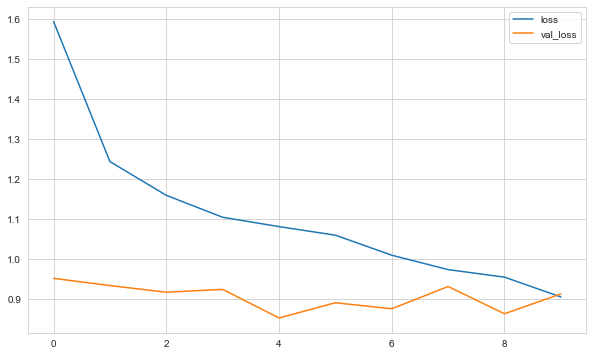

In [39]:
losses = pd.DataFrame(model.history.history)
losses.plot()

yukarıda loss değeri epoch içindeki batchlerin ortalaması oluyor. ancak val_loss ise ilk epoch sonunda oluştuğundan dolayı ilk olarak yüksek başlar ancak zamanla loss artarken val_loss azalır. 

## Evaluate on Test Data

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [41]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

### First way : after each prediction, reel value will be used for next prediction¶

çoğu notebookta görebileceğimiz bu durum yani prediction sonrası predictionı bir sonraki forecast içine koyarak değilde gerçek değer ile tekrar prediction yapıyoruz.

In [42]:
y_pred = model.predict(X_test)

In [43]:
y_pred

array([[ 1.8057915 ],
       [ 1.1690673 ],
       [ 0.66969156],
       [ 0.5685047 ],
       [ 0.33057475],
       [ 0.44133976],
       [ 0.28980687],
       [ 0.17768669],
       [ 0.06858137],
       [ 0.03342874],
       [ 0.07847293],
       [ 0.13893548],
       [ 0.23077253],
       [ 0.34431508],
       [ 0.71239245],
       [ 0.89934015],
       [ 1.2646735 ],
       [ 2.0956204 ],
       [ 2.143871  ],
       [ 2.075357  ],
       [ 2.0387716 ],
       [ 1.9365541 ],
       [ 1.7730576 ],
       [ 2.0696185 ],
       [ 1.9057318 ],
       [ 1.7042187 ],
       [ 1.6140692 ],
       [ 1.5055653 ],
       [ 1.3916293 ],
       [ 1.0771964 ],
       [ 1.0251633 ],
       [ 0.8669261 ],
       [ 0.76621914],
       [ 0.6757369 ],
       [ 0.5702934 ],
       [ 0.53999233],
       [ 0.5791496 ],
       [ 0.558092  ],
       [ 0.50061125],
       [ 0.47727916],
       [ 0.28604165],
       [ 0.11903676],
       [ 0.0953394 ],
       [ 0.12649378],
       [ 0.08433039],
       [ 0

In [44]:
eval_metrics(y_test, y_pred)

r2_score: 0.14898025391943925 
mae: 0.8079405855732383 
mse: 1.4849310757900747 
rmse: 1.2185774804213618


### Inverse Transformation and Compare

In [45]:
y_train_inv = target_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = target_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = target_transformer.inverse_transform(y_pred)

In [46]:
test_index = test.iloc[time_steps:].index

pred_test = pd.concat([pd.DataFrame(y_test_inv.reshape(-1, 1)),
                       pd.DataFrame(y_pred_inv)], axis = 1)
pred_test.columns=['test','prediction']
pred_test.index = test_index
pred_test

,test,prediction
date,,
2016-05-21 19:00:00,650.000,1020.085
2016-05-21 20:00:00,570.000,790.864
2016-05-21 21:00:00,810.000,611.089
2016-05-21 22:00:00,440.000,574.662
2016-05-21 23:00:00,890.000,489.007
...,...,...
2016-05-27 14:00:00,610.000,1099.839
2016-05-27 15:00:00,460.000,1022.237
2016-05-27 16:00:00,810.000,884.254


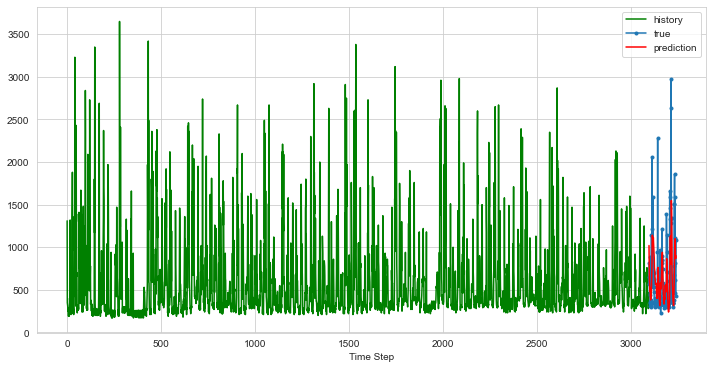

In [47]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.xlabel('Time Step')
plt.legend()
plt.show();

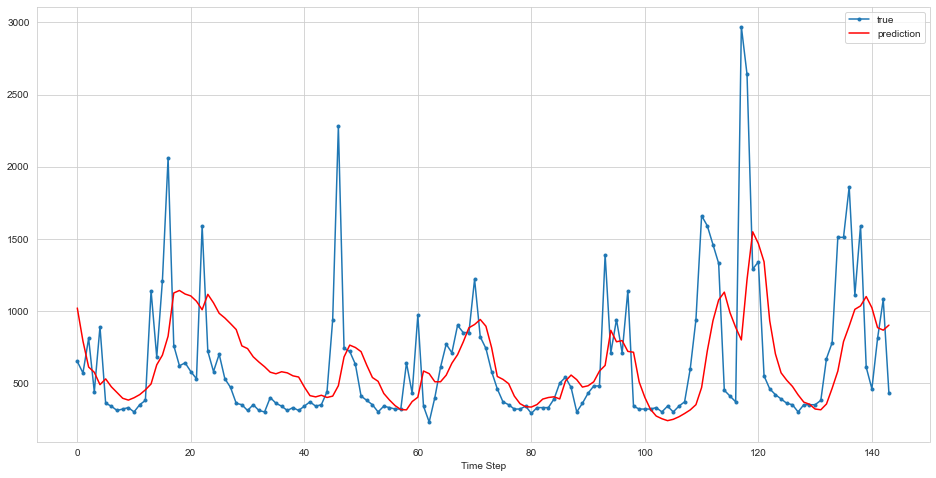

In [48]:
plt.figure(figsize=(16,8))
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.xlabel('Time Step')
plt.legend()
plt.show();

### Second way : after each prediction, result will be used for next prediction

In [49]:
test

,Appliances,lights,T_outside,RH_outside,Press_mm_hg,Windspeed,Visibility,Tdewpoint,T_inside,RH_inside
date,,,,,,,,,,
2016-05-20 19:00:00,0.056,0.000,1.852,-1.082,0.196,0.279,0.000,1.178,1.500,0.975
2016-05-20 20:00:00,0.139,0.000,1.296,-0.898,0.201,-0.115,0.000,1.151,1.423,0.790
2016-05-20 21:00:00,0.056,0.500,0.999,-0.598,0.209,-0.559,0.000,1.384,1.367,0.767
2016-05-20 22:00:00,-0.139,0.500,0.873,-0.435,0.220,-0.721,0.000,1.482,1.347,0.828
2016-05-20 23:00:00,-0.278,0.000,0.890,-0.289,0.208,-0.603,-0.561,1.631,1.321,0.889
...,...,...,...,...,...,...,...,...,...,...
2016-05-27 14:00:00,0.667,0.500,2.622,-1.090,-0.018,-0.441,-2.255,1.991,2.219,0.980
2016-05-27 15:00:00,0.250,0.000,2.722,-1.090,-0.030,-0.441,-2.224,1.949,2.214,0.896
2016-05-27 16:00:00,1.222,0.000,2.702,-1.090,-0.058,-0.324,-2.132,1.953,2.240,0.998


!!!! önemli:

train datasının son 24 satırını alıp bunun ile bir predict yaptırıyorum. daha sonra test datasına geçiyorum ve bunun ilk satırının target feature yerine bu predict değeri yazarak diğer featurelar ile tekrar 24 lü olarak bir predict yaptırıyorum. bu predict değeri test datasının ikinci feature yerine yazıyorum ve buna denk gelen diğer featureları kullanarak yeni bir predict yapıyorum. bu şekilde devam ederek bir sonraki time stepin target değerini predict yaptırıyorum. aşağıdaki for döngüsü ile bunları elde ediyorum.

target label haric test datasının ilk 24 satırını alıyorum. buna df_fake diyoruz. 

In [50]:
df_fake = test.iloc[:time_steps,1:]
df_fake

,lights,T_outside,RH_outside,Press_mm_hg,Windspeed,Visibility,Tdewpoint,T_inside,RH_inside
date,,,,,,,,,
2016-05-20 19:00:00,0.000,1.852,-1.082,0.196,0.279,0.000,1.178,1.500,0.975
2016-05-20 20:00:00,0.000,1.296,-0.898,0.201,-0.115,0.000,1.151,1.423,0.790
2016-05-20 21:00:00,0.500,0.999,-0.598,0.209,-0.559,0.000,1.384,1.367,0.767
2016-05-20 22:00:00,0.500,0.873,-0.435,0.220,-0.721,0.000,1.482,1.347,0.828
2016-05-20 23:00:00,0.000,0.890,-0.289,0.208,-0.603,-0.561,1.631,1.321,0.889
2016-05-21 00:00:00,0.000,0.864,-0.193,0.180,-0.324,-1.398,1.829,1.301,0.941
2016-05-21 01:00:00,0.000,0.892,-0.131,0.143,-0.045,-0.857,1.833,1.286,0.964
2016-05-21 02:00:00,0.000,0.852,-0.123,0.104,0.117,0.000,1.822,1.276,0.977
2016-05-21 03:00:00,0.000,0.773,-0.107,0.076,0.117,-0.561,1.799,1.265,0.987


In [51]:
reel = np.array(test.iloc[:time_steps,:1])
reel.reshape((1,-1))[0]

array([ 0.05555556,  0.13888889,  0.05555556, -0.13888889, -0.27777778,
       -0.22222222, -0.16666667, -0.08333333, -0.22222222, -0.08333333,
       -0.16666667, -0.02777778, -0.08333333,  2.44444444,  4.13888889,
        5.36111111,  6.16666667,  2.77777778,  4.69444444,  4.02777778,
        5.        ,  0.63888889,  0.55555556,  1.05555556])

In [52]:
df_fake.shape

(24, 9)

In [53]:
df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1])).shape

(24, 1, 9)

In [54]:
predictions_scaled = []

first_eval_batch = train.values[-time_steps:]
current_batch = first_eval_batch.reshape((1, time_steps, n_features))
features = df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1]))

for i in range(time_steps):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0])
    new = features[i][0].tolist()
    new.insert(0,current_pred[0][0])
    new = np.array(new).reshape(1,1,n_features)
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], new, axis=1)

In [55]:
predictions_scaled

[array([0.26999056], dtype=float32),
 array([0.04298348], dtype=float32),
 array([-0.1876902], dtype=float32),
 array([-0.2695778], dtype=float32),
 array([-0.32308817], dtype=float32),
 array([-0.471782], dtype=float32),
 array([-0.6127665], dtype=float32),
 array([-0.6644027], dtype=float32),
 array([-0.6119493], dtype=float32),
 array([-0.58539295], dtype=float32),
 array([-0.5144956], dtype=float32),
 array([-0.42105228], dtype=float32),
 array([-0.34623912], dtype=float32),
 array([-0.34202662], dtype=float32),
 array([-0.42980686], dtype=float32),
 array([-0.35399315], dtype=float32),
 array([-0.20615982], dtype=float32),
 array([0.17221336], dtype=float32),
 array([0.4496322], dtype=float32),
 array([0.65483236], dtype=float32),
 array([0.8381996], dtype=float32),
 array([0.98742306], dtype=float32),
 array([1.0873884], dtype=float32),
 array([1.0808591], dtype=float32)]

In [56]:
reel

array([[ 0.05555556],
       [ 0.13888889],
       [ 0.05555556],
       [-0.13888889],
       [-0.27777778],
       [-0.22222222],
       [-0.16666667],
       [-0.08333333],
       [-0.22222222],
       [-0.08333333],
       [-0.16666667],
       [-0.02777778],
       [-0.08333333],
       [ 2.44444444],
       [ 4.13888889],
       [ 5.36111111],
       [ 6.16666667],
       [ 2.77777778],
       [ 4.69444444],
       [ 4.02777778],
       [ 5.        ],
       [ 0.63888889],
       [ 0.55555556],
       [ 1.05555556]])

In [57]:
eval_metrics(reel, predictions_scaled)

r2_score: -0.4292708880692271 
mae: 1.6098333737571482 
mse: 6.554315291849558 
rmse: 2.560139701627542


### Inverse Transformation and Compare

In [58]:
predictions = target_transformer.inverse_transform(predictions_scaled)
reel = target_transformer.inverse_transform(reel)

In [59]:
compare = pd.DataFrame(data = reel, index = test.index[:time_steps], columns = ["reel"])
compare["prediction"] = predictions
compare

,reel,prediction
date,,
2016-05-20 19:00:00,390.000,467.197
2016-05-20 20:00:00,420.000,385.474
2016-05-20 21:00:00,390.000,302.432
2016-05-20 22:00:00,320.000,272.952
2016-05-20 23:00:00,270.000,253.688
2016-05-21 00:00:00,290.000,200.158
2016-05-21 01:00:00,310.000,149.404
2016-05-21 02:00:00,340.000,130.815
2016-05-21 03:00:00,290.000,149.698


<AxesSubplot:xlabel='date'>

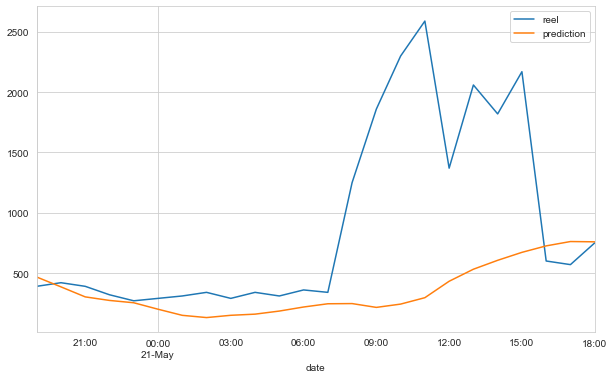

In [60]:
compare.plot()

Model bakınca train ve test datasının bölündüğü yer olarak kötü bir yere denk geldiğinden dolayı iyi bir predict yapamamış.

## Retrain and Forecasting with Full Data

### Scale full data

In [62]:
df_scaled = df.copy()

In [63]:
f_columns = df_scaled.columns[1:]

f_transformer = RobustScaler()
target_transformer = RobustScaler()

df_scaled.loc[:, f_columns] = f_transformer.fit_transform(df_scaled[f_columns])
df_scaled['Appliances'] = target_transformer.fit_transform(df_scaled[['Appliances']])

In [64]:
df_scaled

,Appliances,lights,T_outside,RH_outside,Press_mm_hg,Windspeed,Visibility,Tdewpoint,T_inside,RH_inside
date,,,,,,,,,,
2016-01-11 17:00:00,-0.139,10.500,-0.092,0.546,-2.233,0.757,1.643,0.290,-1.038,1.027
2016-01-11 18:00:00,1.889,15.500,-0.146,0.601,-2.181,0.538,0.000,0.221,-1.043,1.022
2016-01-11 19:00:00,1.833,7.500,-0.188,0.619,-2.129,0.708,0.000,0.173,-0.910,1.392
2016-01-11 20:00:00,1.028,10.500,-0.239,0.596,-2.080,0.708,0.000,0.107,-0.790,1.682
2016-01-11 21:00:00,0.667,7.000,-0.225,0.581,-2.051,0.708,0.000,0.072,-0.643,1.445
...,...,...,...,...,...,...,...,...,...,...
2016-05-27 14:00:00,0.639,0.500,2.403,-1.016,-0.030,-0.462,-2.255,1.785,2.024,0.914
2016-05-27 15:00:00,0.222,0.000,2.496,-1.016,-0.043,-0.462,-2.224,1.746,2.019,0.833
2016-05-27 16:00:00,1.194,0.000,2.478,-1.016,-0.072,-0.339,-2.132,1.749,2.043,0.931


Let's devide dataset as "full" and "val". We can think about this "val" data as the weather forecast of next days.

Son 24 saati predict için tekrar ayırıyorum. yukarıdaki test datasını daha küçültülmüş bir hali diye düşünebiliriz.

In [65]:
val_size = 24
val = df_scaled.iloc[-val_size:]
full = df_scaled.iloc[:-val_size]
print(len(full), len(val))

3266 24


### reshape to [samples, time_steps, n_features]

modele vermek için datayı 24,1 lik paketler haline getiriyoruz.

In [66]:
X, y = create_dataset(full, full.Appliances, time_steps)

print(X.shape, y.shape)

(3242, 24, 10) (3242,)


### Create Final model with full data

In [67]:
model = Sequential()

model.add(Bidirectional(LSTM(units=100, input_shape=(time_steps, n_features))))

#model.add(Dropout(rate=0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')

In [68]:
model.fit(X, y, 
          epochs=15, 
          batch_size=24, 
         # shuffle=False
         )

Epoch 1/15
136/136 [==============================] - 6s 19ms/step - loss: 1.3379
Epoch 2/15
136/136 [==============================] - 3s 19ms/step - loss: 1.1038
Epoch 3/15
136/136 [==============================] - 2s 16ms/step - loss: 1.0580
Epoch 4/15
136/136 [==============================] - 2s 18ms/step - loss: 1.0402
Epoch 5/15
136/136 [==============================] - 2s 17ms/step - loss: 0.9970
Epoch 6/15
136/136 [==============================] - 2s 16ms/step - loss: 0.9836
Epoch 7/15
136/136 [==============================] - 3s 19ms/step - loss: 0.9567
Epoch 8/15
136/136 [==============================] - 3s 25ms/step - loss: 0.9153
Epoch 9/15
136/136 [==============================] - 3s 22ms/step - loss: 0.8835
Epoch 10/15
136/136 [==============================] - 3s 22ms/step - loss: 0.8520
Epoch 11/15
136/136 [==============================] - 3s 23ms/step - loss: 0.8325
Epoch 12/15
136/136 [==============================] - 3s 22ms/step - loss: 0.8038
Epoch 13/15
1

<AxesSubplot:>

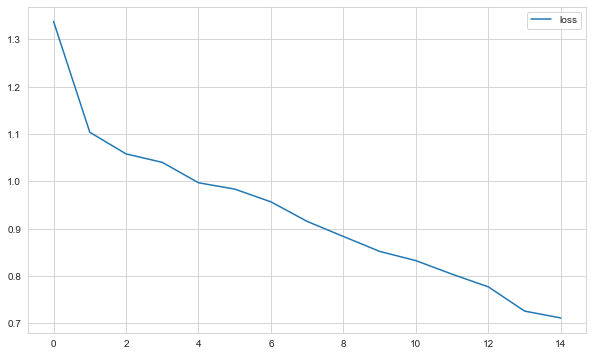

In [69]:
losses = pd.DataFrame(model.history.history)
losses.plot()

### forecasting

In [70]:
df_fake = val.iloc[:,1:]
df_fake

,lights,T_outside,RH_outside,Press_mm_hg,Windspeed,Visibility,Tdewpoint,T_inside,RH_inside
date,,,,,,,,,
2016-05-26 19:00:00,0.000,2.011,-1.016,-0.060,-0.170,-0.786,1.134,1.862,0.749
2016-05-26 20:00:00,4.500,1.634,-1.006,-0.048,-0.170,-0.867,1.237,1.838,1.143
2016-05-26 21:00:00,4.000,1.311,-0.842,-0.018,-0.047,-0.092,1.368,1.762,0.990
2016-05-26 22:00:00,6.000,1.111,-0.704,0.000,0.123,2.794,1.444,1.738,0.974
2016-05-26 23:00:00,5.500,0.996,-0.619,0.000,0.000,2.886,1.403,1.695,0.954
2016-05-27 00:00:00,1.000,0.932,-0.513,-0.008,-0.292,2.764,1.355,1.671,0.966
2016-05-27 01:00:00,0.000,0.910,-0.465,-0.028,-0.462,2.693,1.338,1.633,0.959
2016-05-27 02:00:00,0.000,0.875,-0.401,-0.036,-0.585,2.641,1.334,1.605,0.974
2016-05-27 03:00:00,0.000,0.833,-0.336,-0.043,-0.389,2.163,1.375,1.576,0.983


In [71]:
reel = np.array(val.iloc[:,:1])
reel.reshape((1,-1))[0]

array([ 2.66666667,  0.47222222,  0.22222222,  0.11111111,  0.02777778,
       -0.05555556, -0.08333333, -0.22222222, -0.08333333, -0.08333333,
       -0.08333333,  0.        ,  0.80555556,  1.11111111,  3.13888889,
        3.13888889,  4.11111111,  2.02777778,  3.36111111,  0.63888889,
        0.22222222,  1.19444444,  1.94444444,  0.13888889])

### First way : after each prediction, reel value will be use for next prediction¶

In [72]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 24

first_eval_batch = full.values[-time_steps:]
current_batch = first_eval_batch.reshape((1, time_steps, full.shape[1]))
features = df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1]))

for i in range(periods):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)[0][0]
    
    # store prediction
    forecast.append(current_pred) 
    new = features[i][0].tolist()
    new.insert(0,reel[i][0])
    new = np.array(new).reshape(1,1,full.shape[1])
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], new, axis = 1)

In [73]:
eval_metrics(reel.reshape((1,-1))[0], forecast)

r2_score: 0.023645228525108197 
mae: 0.8857509832898224 
mse: 1.6921044748370073 
rmse: 1.300809161574828


In [74]:
forecast = target_transformer.inverse_transform(np.array(forecast).reshape(1,-1))
forecast

array([[1383.7385 , 1089.9812 ,  536.0654 ,  533.7698 ,  523.2566 ,
         412.16013,  270.4928 ,  223.40948,  212.80748,  231.91658,
         232.13597,  268.14032,  328.2308 ,  517.0439 ,  698.72424,
         932.445  ,  919.6301 ,  898.794  ,  669.7764 ,  574.01514,
         374.81653,  920.6477 , 1543.267  , 1722.381  ]], dtype=float32)

In [75]:
forecast_index = pd.date_range(start = '2016-05-26 19:00:00', periods = periods, freq = 'H')

In [76]:
forecast_df = pd.DataFrame(data = forecast.reshape(-1, 1), index = forecast_index, columns = ['Forecast'])

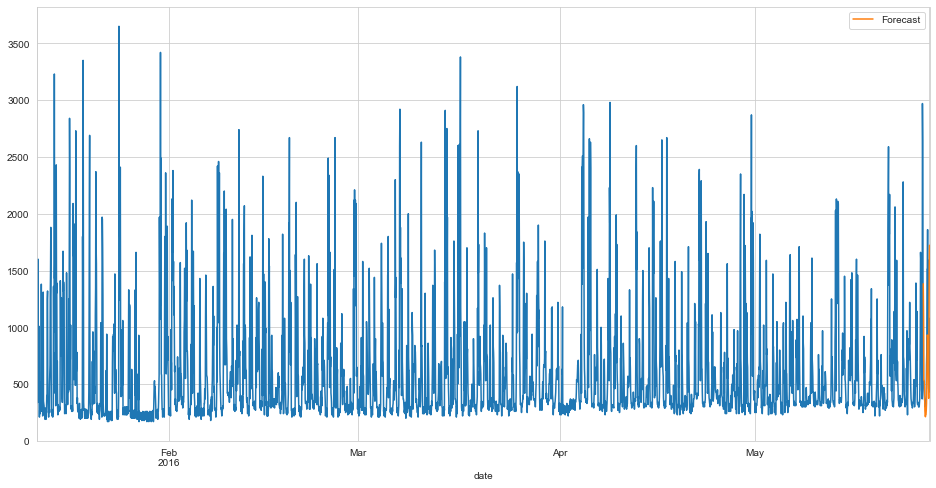

In [77]:
ax = df["Appliances"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(406699.0, 406770.0)

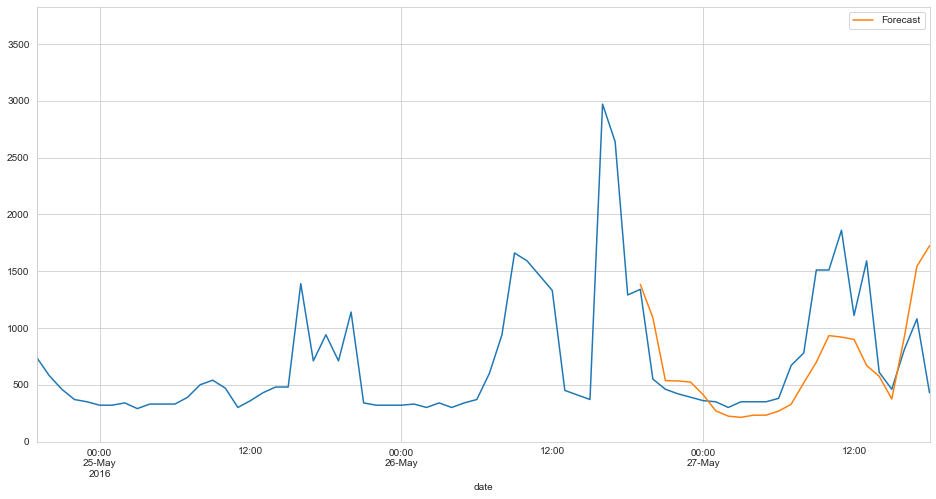

In [78]:
ax = df["Appliances"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2016-05-24 19:00:00', '2016-05-27 18:00:00')

yukarıda görüldüğü gibi gerçek değerler ile forecast yapınca sonuçların fena olmadığını görüyoruz.

### Second way : after each prediction, result will be use for next prediction

In [79]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 24

first_eval_batch = full.values[-time_steps:]
current_batch = first_eval_batch.reshape((1, time_steps, full.shape[1]))
features = df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1]))

for i in range(periods):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)[0][0]
    
    # store prediction
    forecast.append(current_pred) 
    new = features[i][0].tolist()
    new.insert(0,current_pred)
    new = np.array(new).reshape(1,1,full.shape[1])
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], new, axis = 1)

In [80]:
eval_metrics(reel.reshape((1,-1))[0], forecast)

r2_score: -0.5097721194374616 
mae: 1.20732890052238 
mse: 2.6165613503635945 
rmse: 1.6175788544499445


In [81]:
forecast = target_transformer.inverse_transform(np.array(forecast).reshape(1,-1))
forecast

array([[1383.7385  , 1104.0635  ,  694.95734 ,  583.0048  ,  535.72217 ,
         441.85434 ,  306.31287 ,  226.62398 ,  206.44727 ,  202.12865 ,
         196.30711 ,  229.37733 ,  283.41336 ,  386.4425  ,  522.49066 ,
         587.5106  ,  507.28683 ,  364.87186 ,  173.93962 ,   59.037476,
         191.85115 ,  377.82547 ,  549.735   ,  939.5827  ]],
      dtype=float32)

In [82]:
forecast_index = pd.date_range(start = '2016-05-26 19:00:00', periods = periods, freq = 'H')

In [83]:
forecast_df = pd.DataFrame(data = forecast.reshape(-1, 1), index = forecast_index, columns = ['Forecast'])

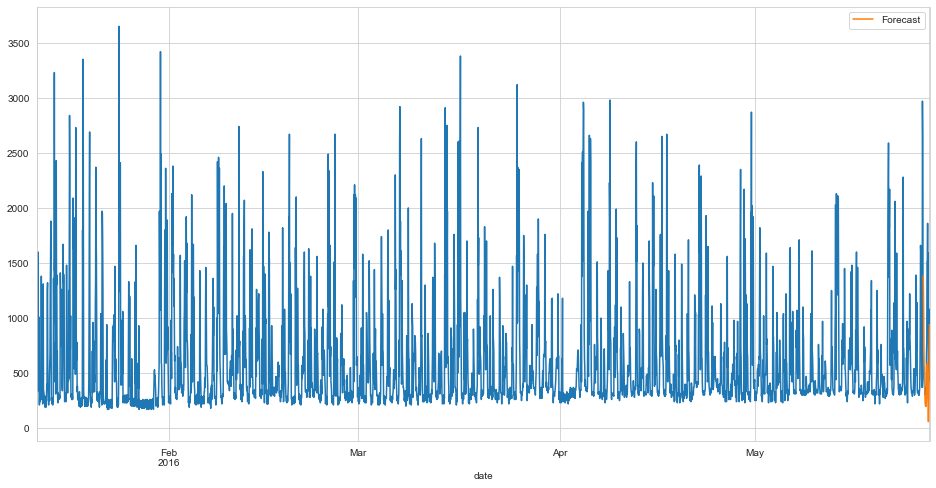

In [84]:
ax = df["Appliances"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(406699.0, 406770.0)

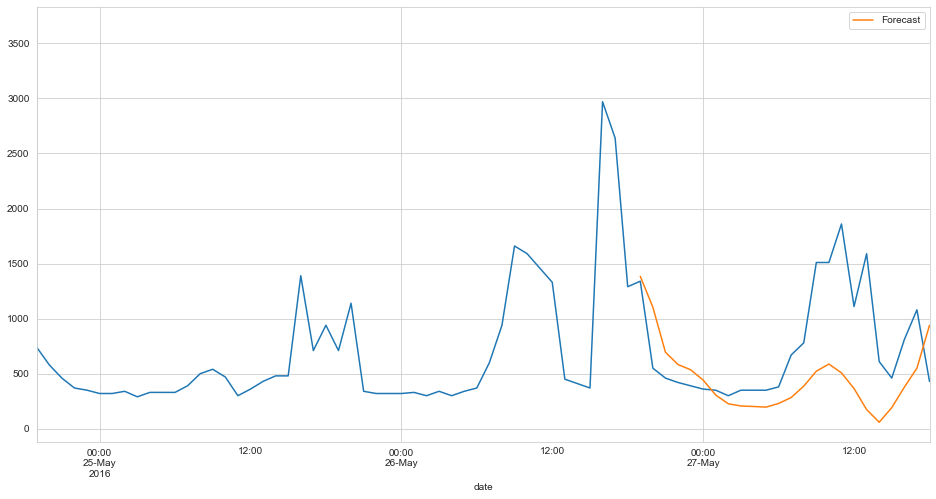

In [85]:
ax = df["Appliances"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2016-05-24 19:00:00', '2016-05-27 18:00:00')

Predict üzerinden aldığımız sonuçlar ile predict yapınca bazı noktalarda yakaladığını görüyoruz.

<p style="text-align: center"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>